In [1]:
%load_ext autoreload
%autoreload 2

from src.utils.visualization.used import *

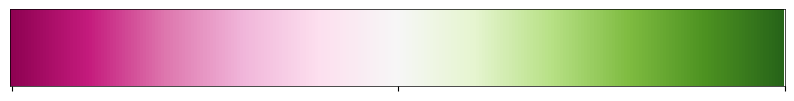

In [2]:
# Your custom colorscheme
colors = ['#8e0152', '#c51b7d', '#de77ae', '#f1b6da', '#fde0ef', 
          '#f7f7f7', '#e6f5d0', '#b8e186', '#7fbc41', '#4d9221', '#276419']
fig, custom_cmap = generate_colorbar_from_color_list(colors, 'figures/Fig_0/custom_colorbar.pdf')


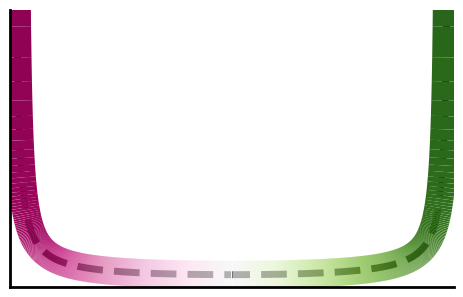

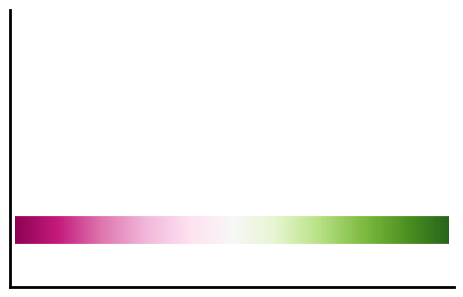

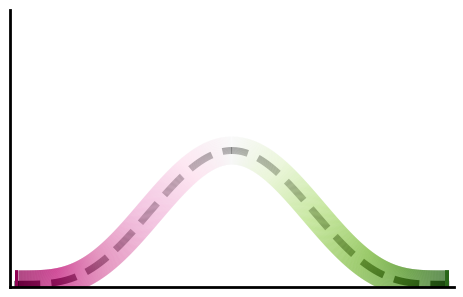

In [3]:
fig, ax = plot_beta_with_gradient(0.1, 0.1, custom_cmap, Nbins=1000)  # Symmetric
fig.savefig('figures/Fig_0/beta_distribution05.pdf', dpi=300, bbox_inches='tight')
fig, ax = plot_beta_with_gradient(1, 1, custom_cmap, Nbins=1000)  # Symmetric
fig.savefig('figures/Fig_0/beta_distribution1.pdf', dpi=300, bbox_inches='tight')
fig, ax = plot_beta_with_gradient(5, 5, custom_cmap, Nbins=1000)  # Symmetric
fig.savefig('figures/Fig_0/beta_distribution5.pdf', dpi=300, bbox_inches='tight')

In [8]:
def from_mm_to_in(value_in_mm):
    """Convert millimeters to inches.
    
    Args:
        value_in_mm: Value in millimeters
        
    Returns:
        float: Value converted to inches
    """
    return value_in_mm / 25.4
Lx_in = from_mm_to_in(11)

In [28]:
def plot_contact_matrix(h_value: float, 
                        n_groups: int = 5,
                        figsize: Tuple[int, int] = (Lx_in, Lx_in),
                        cmap: str = "Blues",
                        save_path: Optional[str] = None):
    """
    Plot a single contact matrix for a specific homophilic tendency (h) value.
    
    Args:
        h_value: Homophilic tendency value to visualize
        n_groups: Number of population groups (matrix size will be n_groups x n_groups)
        figsize: Figure size (width, height)
        cmap: Colormap to use
        save_path: Path to save the figure (if None, figure is not saved)
        
    Returns:
        Matplotlib figure object
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    #ax.set_position([0, 0, 1, 1])
    
    # Create an equal population distribution (a = b = 1)
    pop = jnp.ones(n_groups) * 0.2
    
    # Create contact matrix
    C = create_contact_matrix(n_groups, h_value, pop)
    C = np.flipud(C)
    
    # Plot as heatmap
    ax.imshow(C, cmap=cmap, vmin=0, vmax=3)
    
    # Add text annotations to each cell
#    for row in range(n_groups):
#        for col in range(n_groups):
#            value = np.round(C[row, col], 1)
#            text_color = "black" if value < 1.5 else "white"
#            ax.text(col, row, f"{value:.1f}", 
#                    ha="center", va="center", 
#                    color=text_color, fontsize=3)
    
    # Clean up the display
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    
    # Optional title
    # ax.set_title(f"Contact Matrix (h = {h_value})")
    
    
    # Save if requested
    fig.patch.set_visible(False)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    
    return fig

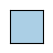

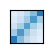

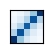

In [29]:
h = 4

h_values = 0  # Different homophilic tendency values
fig = plot_contact_matrix(h_values, n_groups=5, save_path='figures/Fig_0/contact_matrices-.pdf')


h_values = 2  # Different homophilic tendency values
fig = plot_contact_matrix(h_values, n_groups=5, save_path='figures/Fig_0/contact_matrices0.pdf')


h_values = 4  # Different homophilic tendency values
fig = plot_contact_matrix(h_values, n_groups=5, save_path='figures/Fig_0/contact_matrices+.pdf')



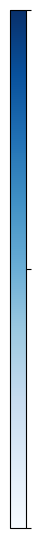

In [10]:
cbar_fig = create_standalone_colorbar(
    cmap_name='Blues',
    vmin=0,
    vmax=2,
    height=Ly*3,
    width=Ly/8*3,
    ticks=[0, 1, 2],
    ticklabels=[],
    save_path='figures/Fig_0/colorbar_contact_matrices.pdf'
)